2025-03-09 02:52:18.604260: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-09 02:52:18.615165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741459938.626298  673543 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741459938.629839  673543 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 02:52:18.641518: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Training with Optimizer: SGD, Regularization: none


/home/kenny1208/anaconda3/envs/TF_GPU/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741459940.572383  673543 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13689 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9
I0000 00:00:1741459941.623938  673685 service.cc:148] XLA service 0x7f82e40145e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741459941.623998  673685 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2025-03-09 02:52:21.632379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disab

Training with Optimizer: SGD, Regularization: l1


2025-03-09 02:52:43.096455: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_254', 60 bytes spill stores, 60 bytes spill loads

2025-03-09 02:52:43.119020: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_254', 72 bytes spill stores, 72 bytes spill loads



Training with Optimizer: SGD, Regularization: l2
Training with Optimizer: SGD, Regularization: dropout


2025-03-09 02:53:13.905173: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_922', 56 bytes spill stores, 56 bytes spill loads

2025-03-09 02:53:13.926905: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_922', 52 bytes spill stores, 52 bytes spill loads

2025-03-09 02:53:13.998079: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_922', 16 bytes spill stores, 16 bytes spill loads



Training with Optimizer: SGD, Regularization: batchnorm


2025-03-09 02:53:30.438311: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_557', 52 bytes spill stores, 52 bytes spill loads

2025-03-09 02:53:30.583758: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_179', 56 bytes spill stores, 56 bytes spill loads

2025-03-09 02:53:30.898131: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_557', 56 bytes spill stores, 56 bytes spill loads



Training with Optimizer: Momentum, Regularization: none
Training with Optimizer: Momentum, Regularization: l1
Training with Optimizer: Momentum, Regularization: l2
Training with Optimizer: Momentum, Regularization: dropout
Training with Optimizer: Momentum, Regularization: batchnorm
Training with Optimizer: RMSProp, Regularization: none
Training with Optimizer: RMSProp, Regularization: l1
Training with Optimizer: RMSProp, Regularization: l2
Training with Optimizer: RMSProp, Regularization: dropout
Training with Optimizer: RMSProp, Regularization: batchnorm


2025-03-09 02:56:02.778210: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_591', 52 bytes spill stores, 52 bytes spill loads

2025-03-09 02:56:02.806243: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_591', 56 bytes spill stores, 56 bytes spill loads



Training with Optimizer: Adam, Regularization: none
Training with Optimizer: Adam, Regularization: l1
Training with Optimizer: Adam, Regularization: l2
Training with Optimizer: Adam, Regularization: dropout
Training with Optimizer: Adam, Regularization: batchnorm


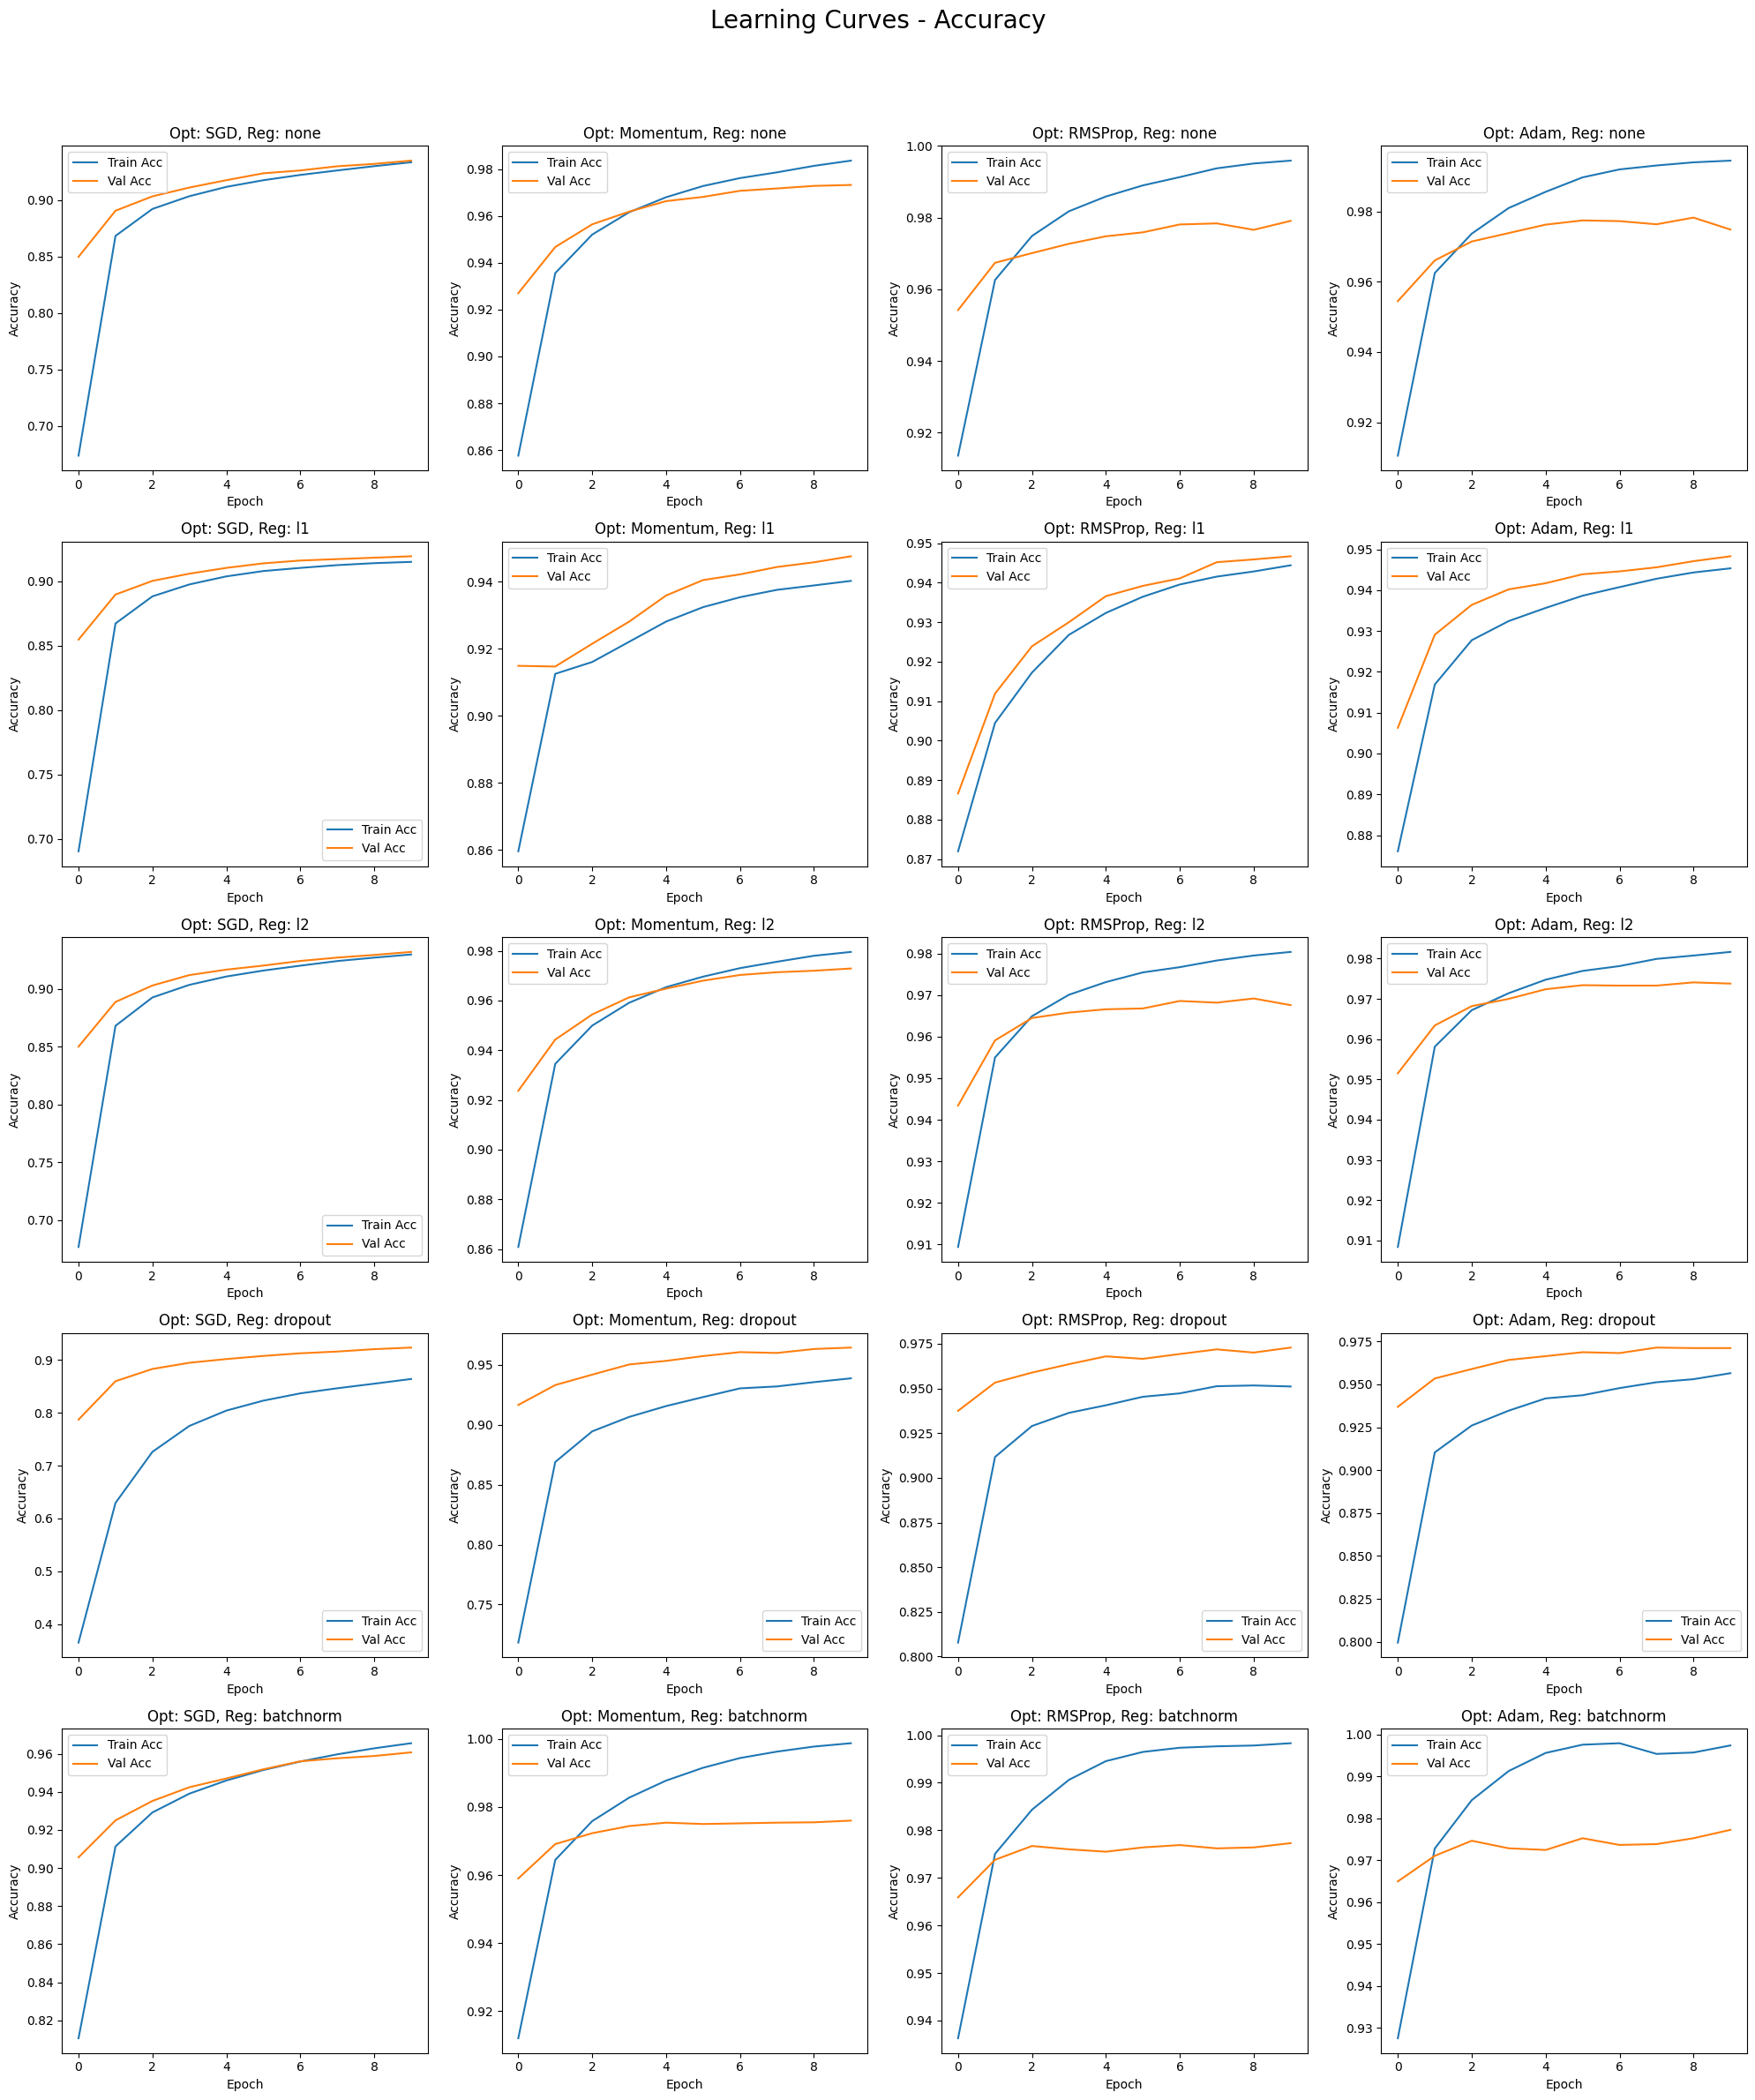

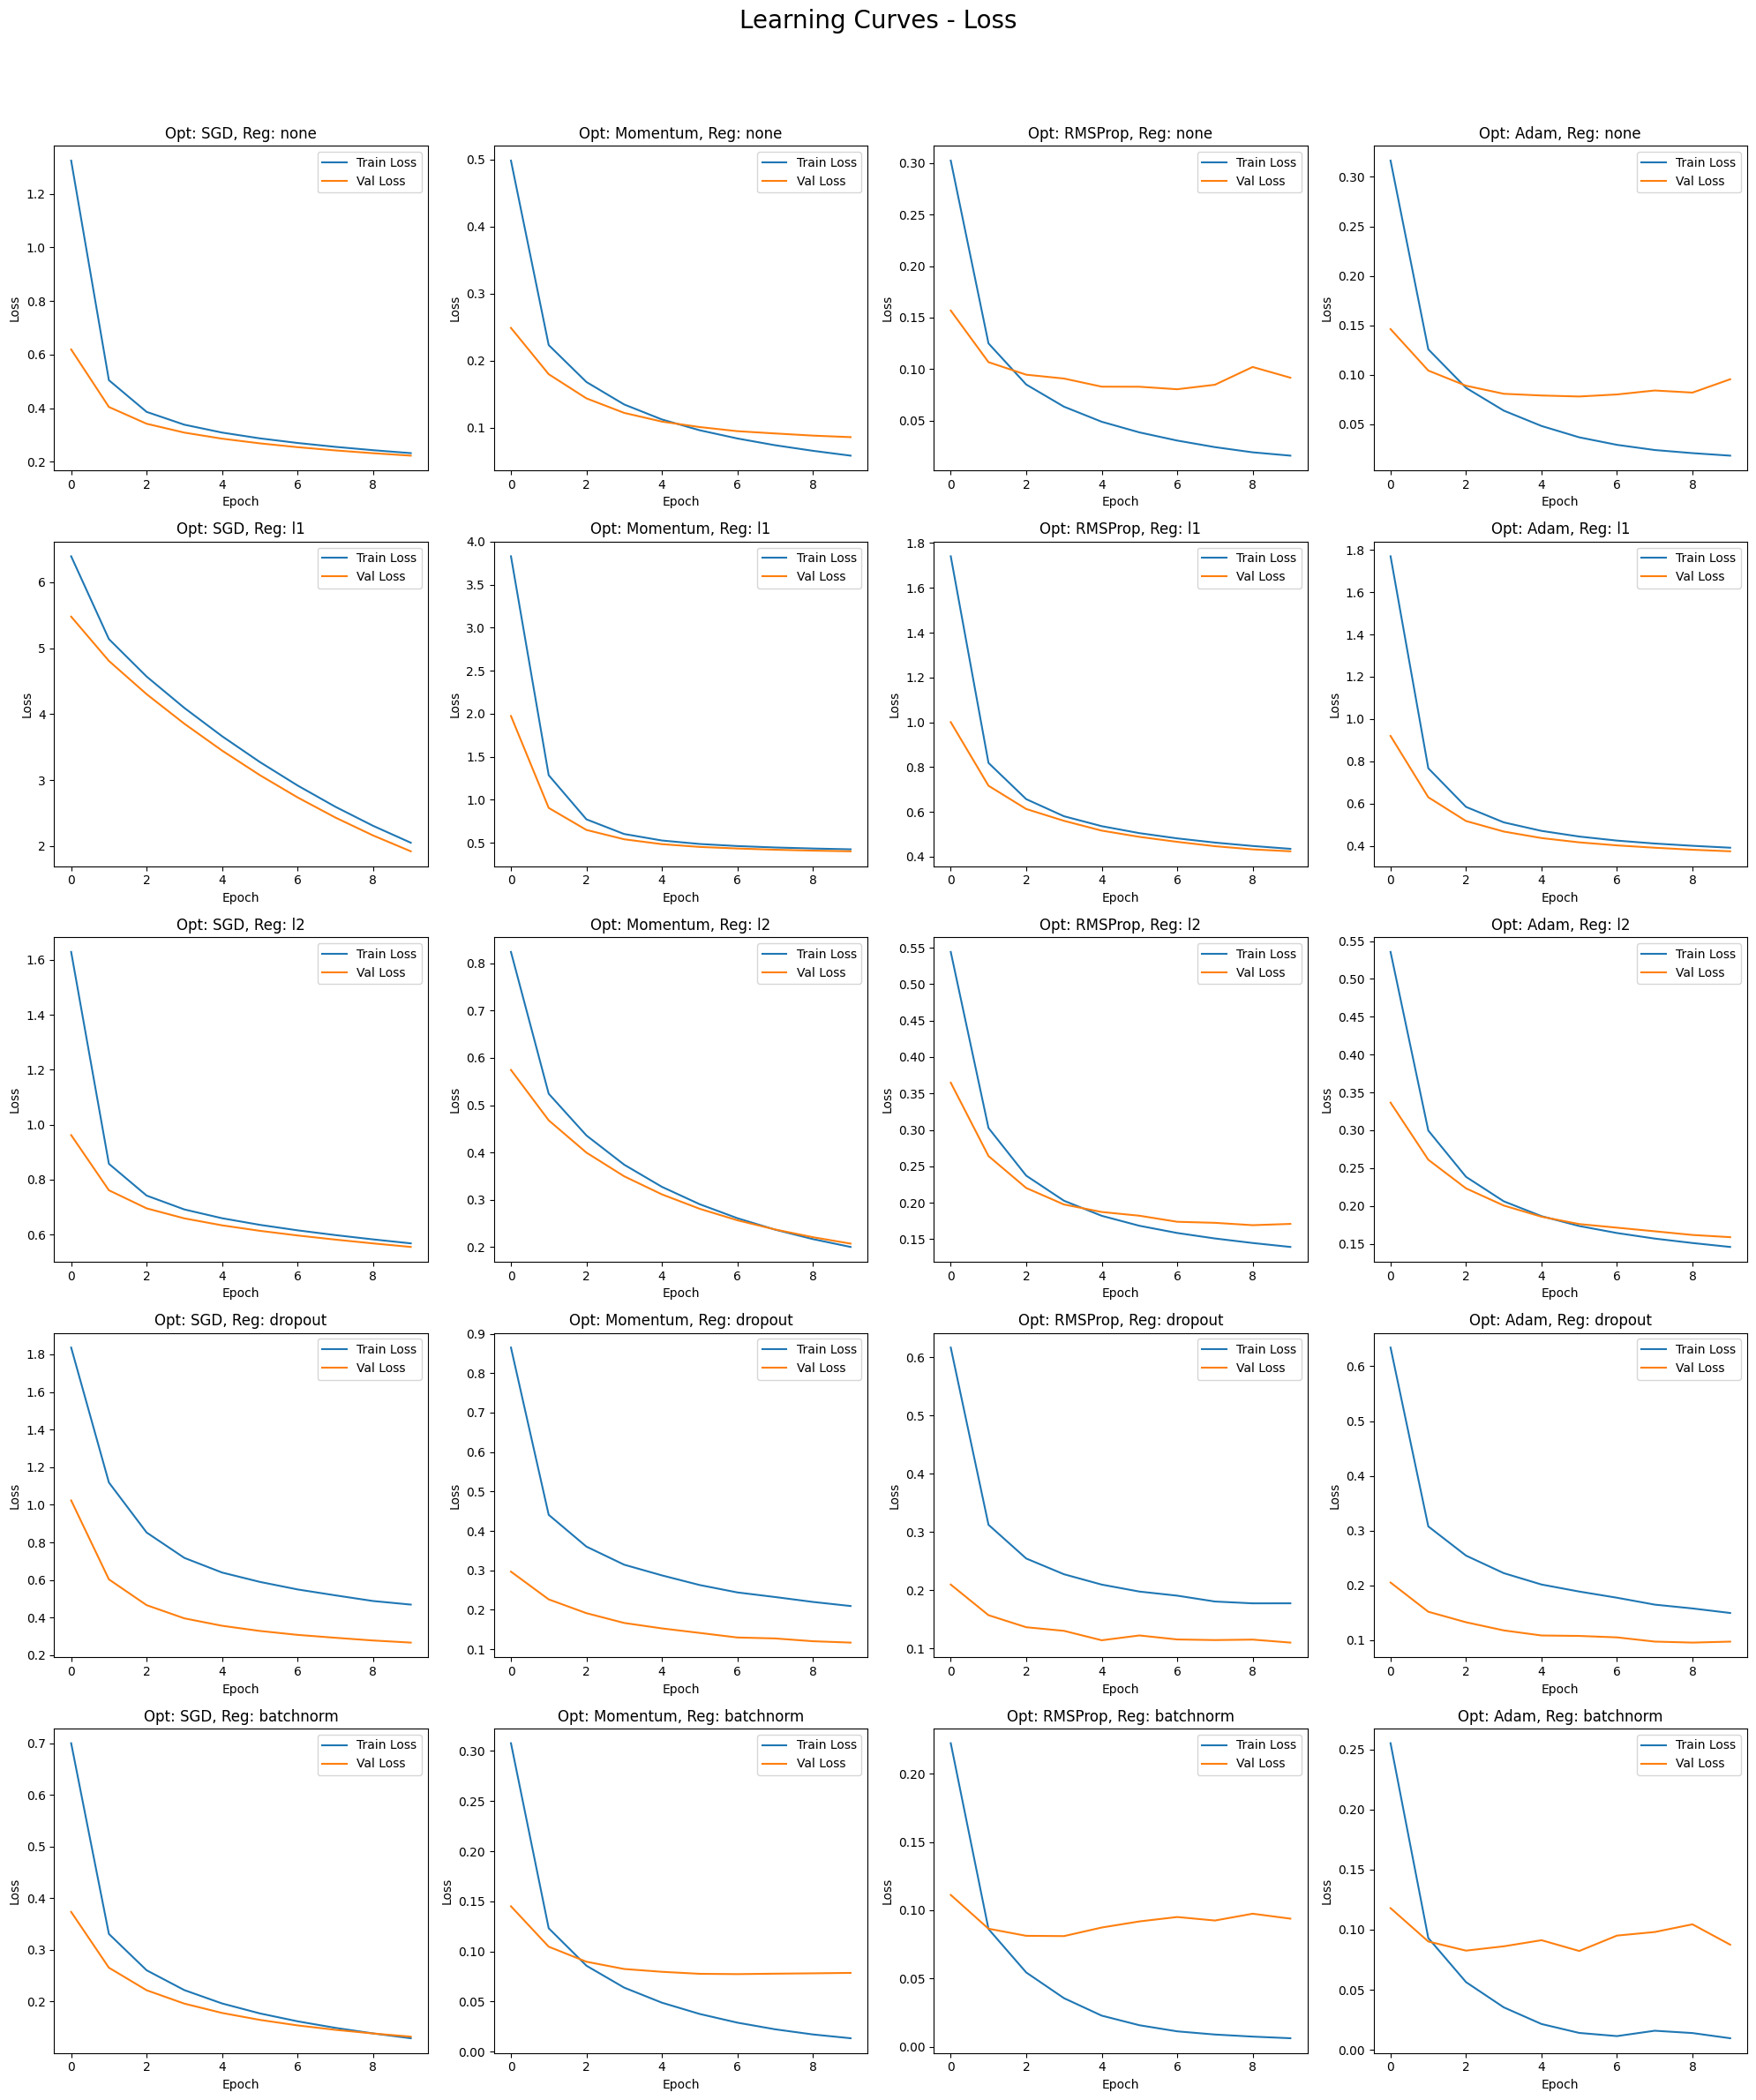

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)
np.random.seed(42)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

num_classes = 10

def create_model(reg_type="none"):

    model = tf.keras.Sequential()
    if reg_type == "batchnorm":
        model.add(tf.keras.layers.Dense(128, use_bias=False, input_shape=(28*28,)))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
    else:
        if reg_type == "l1":
            reg = tf.keras.regularizers.l1(0.001)
        elif reg_type == "l2":
            reg = tf.keras.regularizers.l2(0.001)
        else:
            reg = None
        
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=reg, input_shape=(28*28,)))
    
    if reg_type == "dropout":
        model.add(tf.keras.layers.Dropout(0.5))
    
    if reg_type == "batchnorm":
        model.add(tf.keras.layers.Dense(128, use_bias=False))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Activation('relu'))
    else:
        if reg_type in ["l1", "l2"]:
            reg = tf.keras.regularizers.l1(0.001) if reg_type=="l1" else tf.keras.regularizers.l2(0.001)
        else:
            reg = None
        model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=reg))
    
    if reg_type == "dropout":
        model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    
    return model

optimizer_dict = {
    "SGD": lambda: tf.keras.optimizers.SGD(),
    "Momentum": lambda: tf.keras.optimizers.SGD(momentum=0.9),
    "RMSProp": lambda: tf.keras.optimizers.RMSprop(),
    "Adam": lambda: tf.keras.optimizers.Adam()
}

reg_types = ["none", "l1", "l2", "dropout", "batchnorm"]

history_dict = {}

epochs = 10
batch_size = 128


for opt_name in optimizer_dict:
    for reg in reg_types:
        print(f"Training with Optimizer: {opt_name}, Regularization: {reg}")
        model = create_model(reg_type=reg)
        optimizer = optimizer_dict[opt_name]()
        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs=epochs,
                            batch_size=batch_size,
                            verbose=0) 
        history_dict[(opt_name, reg)] = history

n_rows = len(reg_types)
n_cols = len(optimizer_dict)

fig_acc, axs_acc = plt.subplots(n_rows, n_cols, figsize=(20, 25))
for i, reg in enumerate(reg_types):
    for j, opt_name in enumerate(optimizer_dict.keys()):
        hist = history_dict[(opt_name, reg)]
        ax = axs_acc[i, j]
        ax.plot(hist.history['accuracy'], label='Train Acc')
        ax.plot(hist.history['val_accuracy'], label='Val Acc')
        ax.set_title(f"Opt: {opt_name}, Reg: {reg}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Accuracy")
        ax.legend()
fig_acc.suptitle("Learning Curves - Accuracy", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig_loss, axs_loss = plt.subplots(n_rows, n_cols, figsize=(20, 25))
for i, reg in enumerate(reg_types):
    for j, opt_name in enumerate(optimizer_dict.keys()):
        hist = history_dict[(opt_name, reg)]
        ax = axs_loss[i, j]
        ax.plot(hist.history['loss'], label='Train Loss')
        ax.plot(hist.history['val_loss'], label='Val Loss')
        ax.set_title(f"Opt: {opt_name}, Reg: {reg}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()
fig_loss.suptitle("Learning Curves - Loss", fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()